In [19]:
#from   mpl_finance import quotes_historical_yahoo_ochl as yahoo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from   scipy import stats
import statsmodels.api as sm

%matplotlib inline

In [2]:
DATA = '../../../data'

In [3]:
y = [1, 2, 3, 4, 2, 3, 4]
x = range(1, 8)
x = sm.add_constant(x)
x

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

In [4]:
results = sm.OLS(y, x).fit()
results.params

array([1.28571429, 0.35714286])

In [5]:
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     4.630
Date:                Tue, 12 Nov 2019   Prob (F-statistic):             0.0841
Time:                        06:14:44   Log-Likelihood:                -7.8466
No. Observations:                   7   AIC:                             19.69
Df Residuals:                       5   BIC:                             19.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2857      0.742      1.732      0.144      -0.622       3.194
x1             0.3571      0.166      2.152      0.084      -0.070       0.784
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.976
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.342
Skew:                           0.289   Prob(JB):                        0.843
Kurtosis:                       2.083   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
ret = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mk_ret = [0.055, -0.09, -0.041, 0.045, 0.022]
beta, alpha, r_val, p_val, se = stats.linregress(ret, mk_ret)

In [7]:
beta, alpha

(0.5077431878770808, -0.008481900352462384)

In [8]:
r_val ** 2 # rsq

0.1478856629663111

In [9]:
p_val

0.5227155239089462

In [10]:
alpha = 1
beta = 0.8
n = 100

x = sp.arange(n) # 0:99
y = alpha + beta*x + sp.random.rand(n)

In [11]:
beta, alpha, rval, pval, se = stats.linregress(y, x)
print(f'alpha:{alpha}\nbeta:  {beta}\nrsq.   {rval ** 2}\np:     {pval}')

alpha:-1.9071682676273198
beta:  1.2516836438039447
rsq.   0.9998410437650361
p:     5.859408636366022e-188


In [37]:
msft = pd.read_csv(f'{DATA}/msft.csv')
sp500 = pd.read_csv(f'{DATA}/^gspc.csv')
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,46.660000,47.419998,46.540001,46.759998,42.122040,27913900
1,2015-01-05,46.369999,46.730000,46.250000,46.330002,41.734680,39673900
2,2015-01-06,46.380001,46.750000,45.540001,45.650002,41.122128,36447900
3,2015-01-07,45.980000,46.459999,45.490002,46.230000,41.644604,29114100
4,2015-01-08,46.750000,47.750000,46.720001,47.590000,42.869705,29645200


In [38]:
ret_msft = (msft['Adj Close'].shift(1) / msft['Adj Close']) - 1
ret_sp =(sp500['Adj Close'].shift(1) / sp500['Adj Close']) - 1

In [48]:
ret_msft = ret_msft[~np.isnan(ret_msft)]
ret_sp = ret_sp[~np.isnan(ret_sp)]

In [49]:
beta, alpha, r, p, se = stats.linregress(ret_sp, ret_msft)
print(f'alpha:{alpha}\nbeta:  {beta}\nrsq.   {rval ** 2}\np:     {pval}')

alpha:-0.0005195573999475107
beta:  1.3143766253284357
rsq.   0.9998410437650361
p:     5.859408636366022e-188


In [50]:
def get_daily_returns(series):
    daily_returns = series.shift(1) / series - 1
    return daily_returns[~np.isnan(daily_returns)]

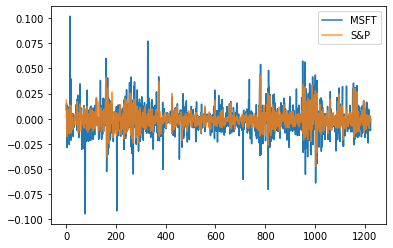

In [52]:
plt.plot(get_daily_returns(msft['Adj Close']), label='MSFT')
plt.plot(get_daily_returns(sp500['Adj Close']), alpha=0.8, label='S&P')
plt.legend();